# Email Spam Classifier

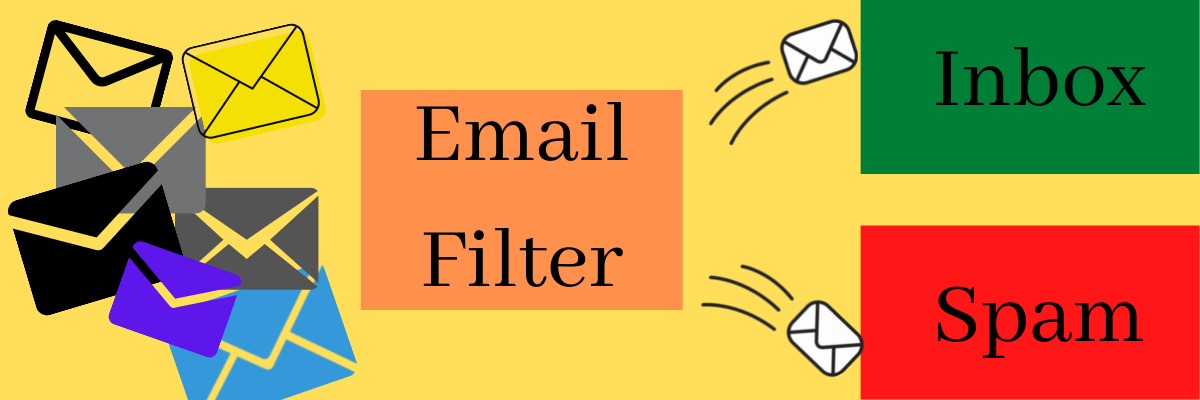

Import the dataset with required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
ed.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
998,ham,Then Ì_ wait 4 me at bus stop aft ur lect lar....,NaN,NaN,NaN
1398,ham,No did you check? I got his detailed message now,NaN,NaN,NaN
3358,spam,Sorry I missed your call let's talk when you h...,NaN,NaN,NaN
4601,ham,\Hey j! r u feeling any better,hopeSo hunny. i amnow feelin ill & ithink i m...,NaN,NaN
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN


In [4]:
ed.shape

(5572, 5)

In [5]:
ed.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Data Cleaning

In [7]:
#Now drop the unuse column

ed.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
ed.sample(5)

,v1,v2
1395,ham,Thats cool! I am a gentleman and will treat yo...
1428,ham,"Tell you what, if you make a little spreadshee..."
1316,ham,Why nothing. Ok anyway give me treat
2746,ham,K da:)how many page you want?
299,ham,Need a coffee run tomo?Can't believe it's that...


In [9]:
#Now rename the column name

ed.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [10]:
ed.sample(5)

,Catagory,Email Body
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...
5361,ham,Yep get with the program. You're slacking.
810,ham,S:)s.nervous &lt;#&gt; :)
5326,ham,What makes you most happy?
300,ham,"Awesome, I remember the last time we got someb..."


In [11]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
ed['Catagory'] = encoder.fit_transform(ed['Catagory'])

In [13]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after apply the LabelEncoder method change the vaule from 0 or 1.
#Here Ham=0 and Spam=1

ed.sample(10)

,Catagory,Email Body
3916,0,Eh ur laptop got no stock lei... He say mon mu...
3132,0,So no messages. Had food?
1258,0,Honey boo I'm missing u.
5507,0,I want to be inside you every night...
4266,0,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
5501,1,PRIVATE! Your 2003 Account Statement for 07808...
1708,0,How's my loverboy doing ? What does he do that...
5534,0,Ok which your another number
2422,0,A bloo bloo bloo I'll miss the first bowl
5370,1,dating:i have had two of these. Only started a...


In [14]:
#Now check duplicate values and removed.

ed.duplicated().sum()

403

In [16]:
ed = ed.drop_duplicates(keep='first')

In [18]:
ed.duplicated().sum()

0

In [19]:
ed.shape

(5169, 2)

EDA

In [20]:
ed.sample(5)

,Catagory,Email Body
5051,0,"Tick, tick, tick .... Where are you ? I could ..."
4528,0,"Hiya, probably coming home * weekend after next"
3052,0,Pls send me the correct name da.
3816,0,This is my number by vivek..
1503,0,Ill be there on &lt;#&gt; ok.


In [21]:
ed['Catagory'].value_counts()

0    4516
1     653
Name: Catagory, dtype: int64

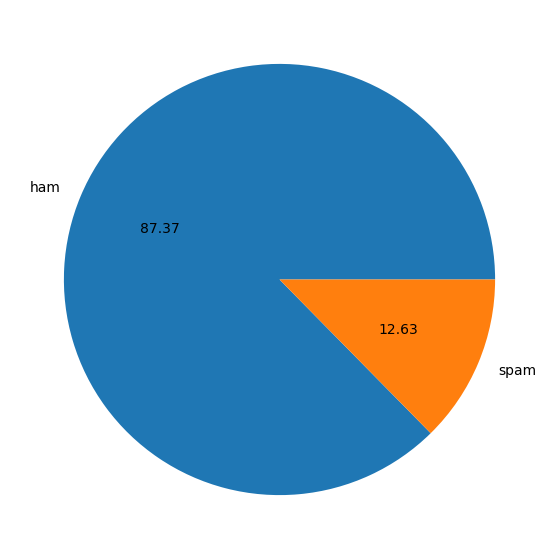

In [22]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "cyan")
plt.pie(ed['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [23]:
#Now we identifie the data is inbalanced, so we deep drive for EDA with NLTK liberaies.

!pip install nltk


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

ed['num_chr'] = ed['Email Body'].apply(len)

In [27]:
ed.sample(5)

,Catagory,Email Body,num_chr
1023,0,May i call You later Pls,24
173,0,"Bloody hell, cant believe you forgot my surnam...",105
5416,0,My slave! I want you to take 2 or 3 pictures o...,112
508,0,What's the significance?,24
1638,0,Great comedy..cant stop laughing da:),37


In [28]:
#We calculate num. of words for each email body with help of NLTK.

ed['num_words'] = ed['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words
1602,0,Ok pa. Nothing problem:-),25,8
1941,1,WELL DONE! Your 4* Costa Del Sol Holiday or å£...,162,33
2853,0,Haha... Hope Ì_ can hear the receipt sound... ...,54,13
401,0,Dear how is chechi. Did you talk to her,39,10
2333,0,What happen to her tell the truth,33,7


In [30]:
#Apply the same rule for calculated sentences.

ed['num_sent'] = ed['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent
2710,1,Hope you enjoyed your new content. text stop t...,118,18,3
5245,0,Thank you princess! I want to see your nice ju...,58,13,2
3712,0,If i not meeting Ì_ all rite then i'll go home...,86,24,2
3118,0,Stop knowing me so well!,24,6,1
4934,0,"Hey babe, how's it going ? Did you ever figure...",83,20,2


In [32]:
ed[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#Now we describe the catagory based like Ham and spam.

#Ham
ed[ed['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#Spam
ed[ed['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


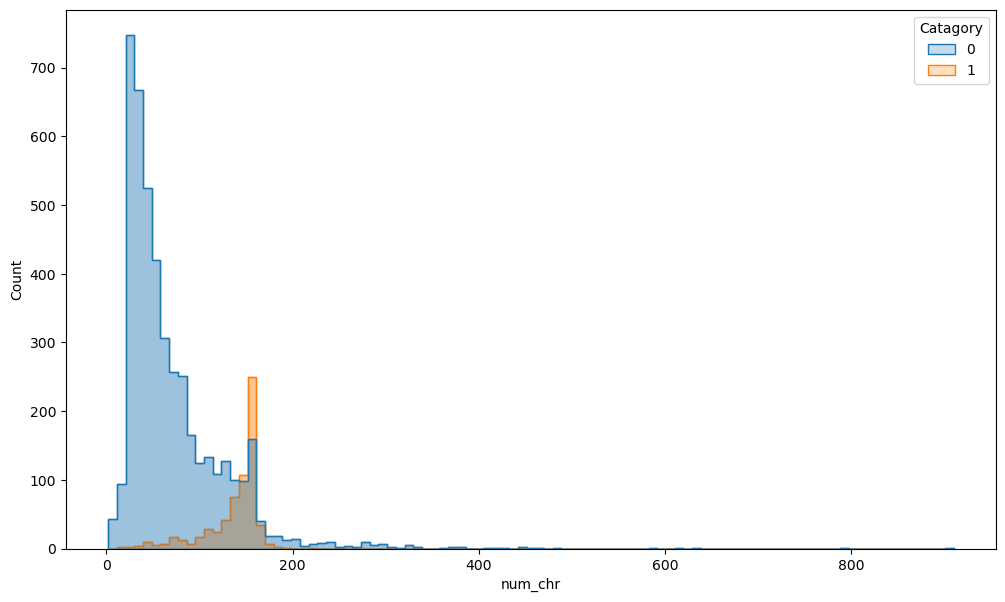

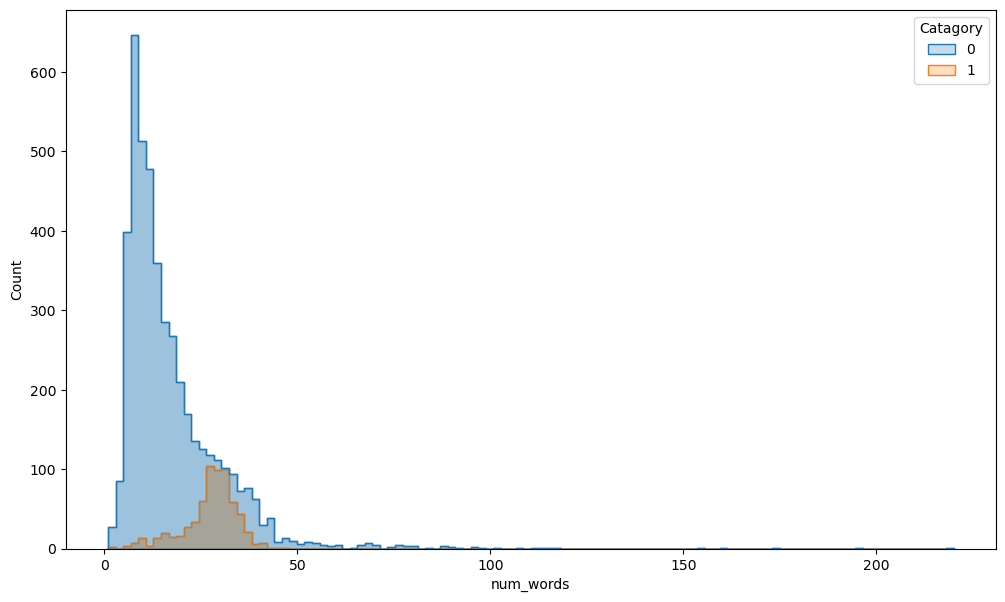

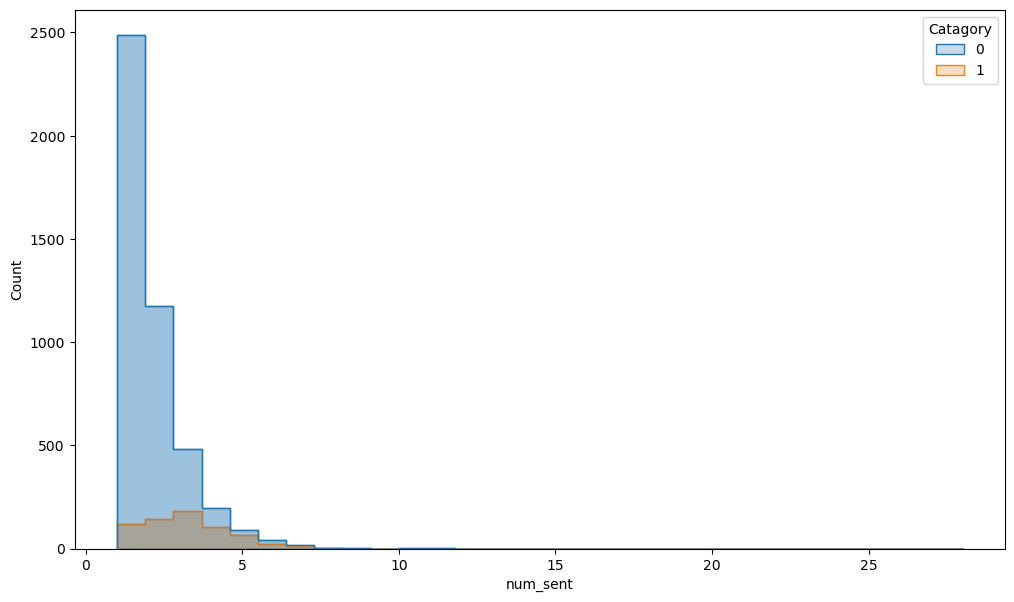

In [35]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=True, element="step")
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=True, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=True, element="step")
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=True, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=True, element="step",bins=30)
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=True, element="step",bins=30)
plt.show()

<Figure size 1200x700 with 0 Axes>

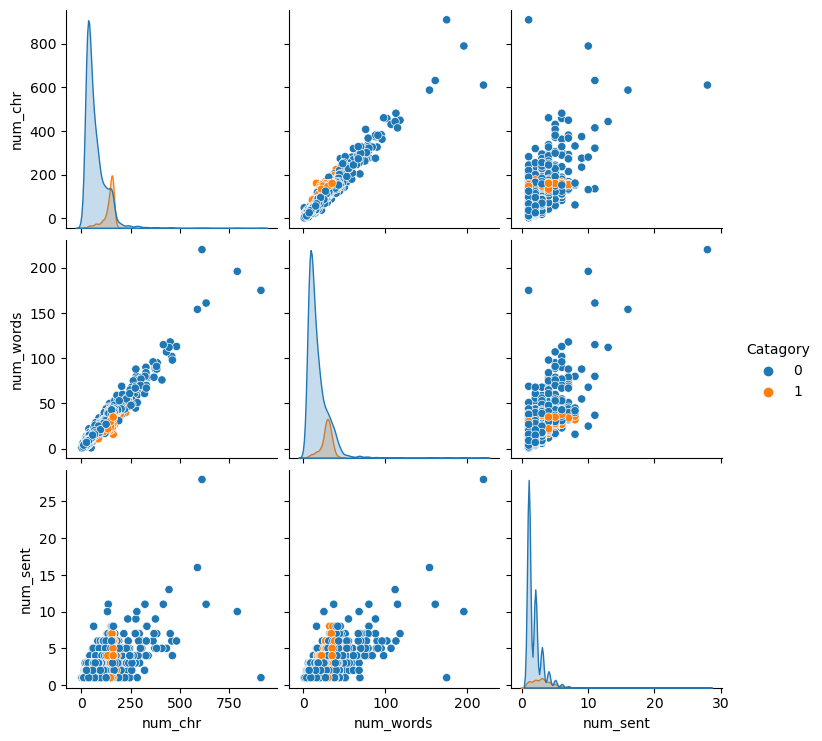

In [37]:
#Creat PairPlot for define the relationship b/w columns.

plt.figure(figsize=(12,7))
sns.pairplot(ed,hue="Catagory")
plt.show()

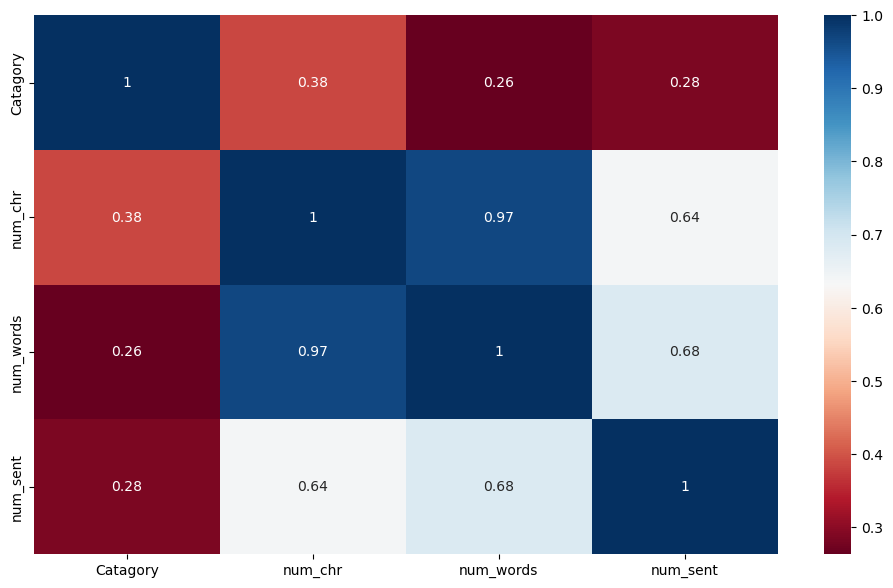

In [47]:
#Correlation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(ed.corr(),annot=True,cmap='RdBu')
plt.show()

Data Preprocessing

FlowChart:

1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming

In [48]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)      

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pranay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [53]:
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [54]:
ed['Email Body'][1500]

'Host-based IDPS for linux systems.'

In [55]:
ed['Transform Text'] = ed['Email Body'].apply(transform_text)

In [56]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
4251,0,"Send ur birthdate with month and year, I will ...",118,27,3,send ur birthdat month year tel u ur life part...
275,0,Thanx...,8,2,1,thanx
391,0,Hey so this sat are we going for the intro pil...,80,18,2,hey sat go intro pilat kickbox
4883,0,For many things its an antibiotic and it can b...,113,21,1,mani thing antibiot use chest abdomen gyna inf...
5119,0,Lol for real. She told my dad I have cancer,43,11,2,lol real told dad cancer


Create WordCloud

In [57]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

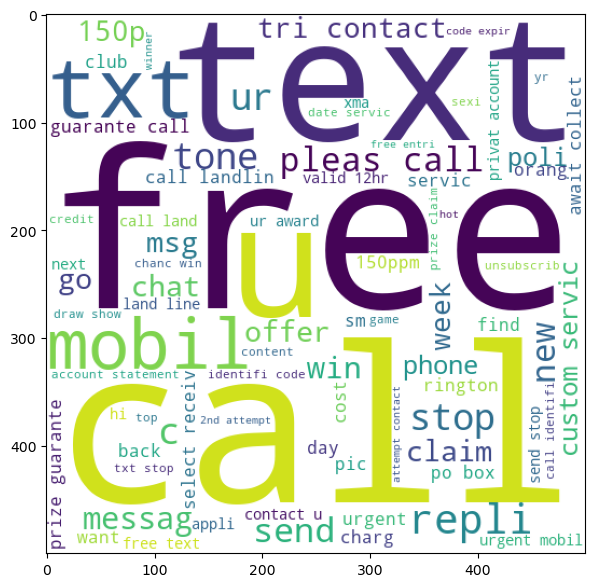

In [58]:
Spam_WC = wc.generate(ed[ed['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Spam_WC)

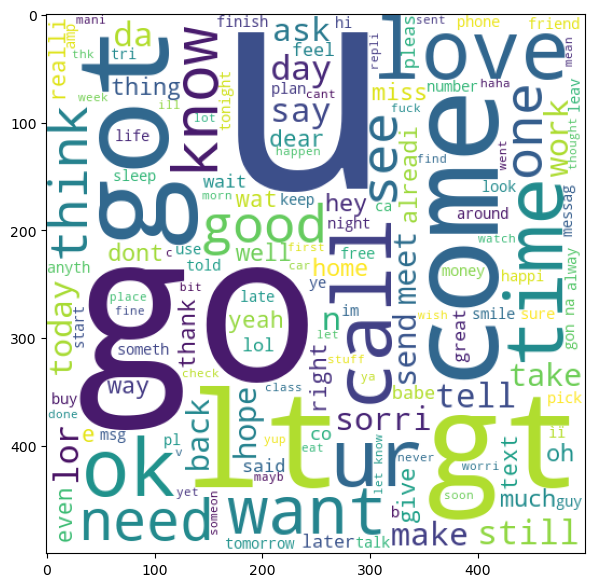

In [59]:
Ham_WC = wc.generate(ed[ed['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Ham_WC)

Top 20 words for Spam & Ham massages.

C:\Users\pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


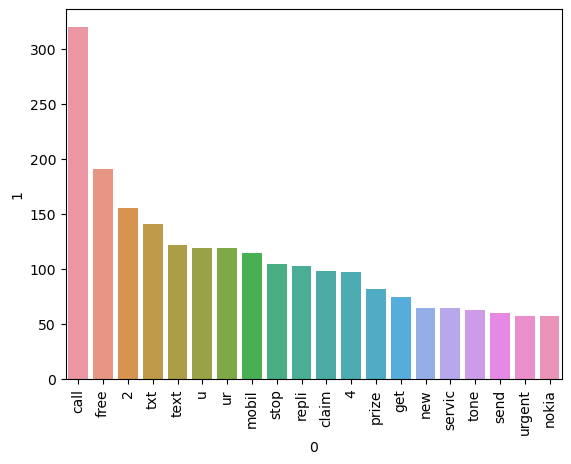

In [60]:
spam_corpus = []
for msg in ed[ed['Catagory'] == 1]['Transform Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

In [62]:
Ham_corpus = []
for msg in ed[ed['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [63]:
len(Ham_corpus)

35394

C:\Users\pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


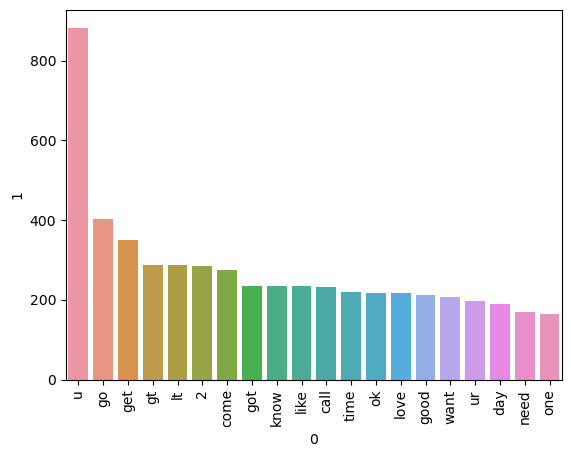

In [64]:
#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ham_corpus).most_common(20))[0],pd.DataFrame(Counter(Ham_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

4th Step Model Building

Text vectorization using Bag of words method

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [66]:
A = cv.fit_transform(ed['Transform Text']).toarray()

In [67]:
#5169=SMS & 6708=Words
A.shape

(5169, 6708)

In [68]:
B = ed['Catagory'].values

In [69]:
B

array([0, 0, 1, ..., 0, 0, 0])

Now train test split

In [70]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

Model from CountVectorizer

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [74]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [75]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Model from TFIDVectorizer

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [77]:
A = tfidf.fit_transform(ed['Transform Text']).toarray()

In [78]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [79]:
B = ed['Catagory'].values

In [80]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [84]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [85]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))